In [1]:
import mask
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from field_importer import get_field
import xarray as xr
import matplotlib.animation as animation
from IPython import display
from scipy.ndimage import gaussian_filter1d as gf

%config Completer.use_jedi = False

In [38]:
# data = Dataset('/home/robbie/Dropbox/beaufort_sea/pressure.nc')
jdata = Dataset('/home/robbie/Dropbox/beaufort_sea/jan2021.nc')
fdata = Dataset('/home/robbie/Dropbox/beaufort_sea/feb2021.nc')

lons = np.array(data['longitude'])
lats = np.array(data['latitude'])

fdata

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-02-18 16:35:02 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data2/adaptor.mars.internal-1613666100.6274478-7407-6-3ea40b07-7fc0-4cd8-87bf-3291158844d7.nc /cache/tmp/3ea40b07-7fc0-4cd8-87bf-3291158844d7-adaptor.mars.internal-1613666100.6279645-7407-2-tmp.grib
    dimensions(sizes): longitude(1440), latitude(121), time(14)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 z(time,latitude,longitude)
    groups: 

In [60]:
z = gf(np.vstack([jdata['z'],fdata['z'][:15]]),sigma=2,axis=1)
z.shape

(45, 121, 1440)

In [46]:
fdata['z']

<class 'netCDF4._netCDF4.Variable'>
int16 z(time, latitude, longitude)
    scale_factor: 0.11026061655005875
    add_offset: 1054.830611879225
    _FillValue: -32767
    missing_value: -32767
    units: m**2 s**-2
    long_name: Geopotential
    standard_name: geopotential
unlimited dimensions: 
current shape = (14, 121, 1440)
filling on

In [55]:
e0 = datetime.date(1900,1,1)
jt = np.array(jdata['time'])
ft = np.array(fdata['time'])

dates = [e0 + datetime.timedelta(hours=int(h)) for h in np.append(jt,ft)]

dates

[datetime.date(2021, 1, 1),
 datetime.date(2021, 1, 2),
 datetime.date(2021, 1, 3),
 datetime.date(2021, 1, 4),
 datetime.date(2021, 1, 5),
 datetime.date(2021, 1, 6),
 datetime.date(2021, 1, 7),
 datetime.date(2021, 1, 8),
 datetime.date(2021, 1, 9),
 datetime.date(2021, 1, 10),
 datetime.date(2021, 1, 11),
 datetime.date(2021, 1, 12),
 datetime.date(2021, 1, 13),
 datetime.date(2021, 1, 14),
 datetime.date(2021, 1, 15),
 datetime.date(2021, 1, 16),
 datetime.date(2021, 1, 17),
 datetime.date(2021, 1, 18),
 datetime.date(2021, 1, 19),
 datetime.date(2021, 1, 20),
 datetime.date(2021, 1, 21),
 datetime.date(2021, 1, 22),
 datetime.date(2021, 1, 23),
 datetime.date(2021, 1, 24),
 datetime.date(2021, 1, 25),
 datetime.date(2021, 1, 26),
 datetime.date(2021, 1, 27),
 datetime.date(2021, 1, 28),
 datetime.date(2021, 1, 29),
 datetime.date(2021, 1, 30),
 datetime.date(2021, 1, 31),
 datetime.date(2021, 2, 1),
 datetime.date(2021, 2, 2),
 datetime.date(2021, 2, 3),
 datetime.date(2021, 2, 4)

In [56]:
start_day = datetime.date(year=2021, month=1, day=1)
start_day_of_year = start_day.timetuple().tm_yday

<IPython.core.display.Javascript object>


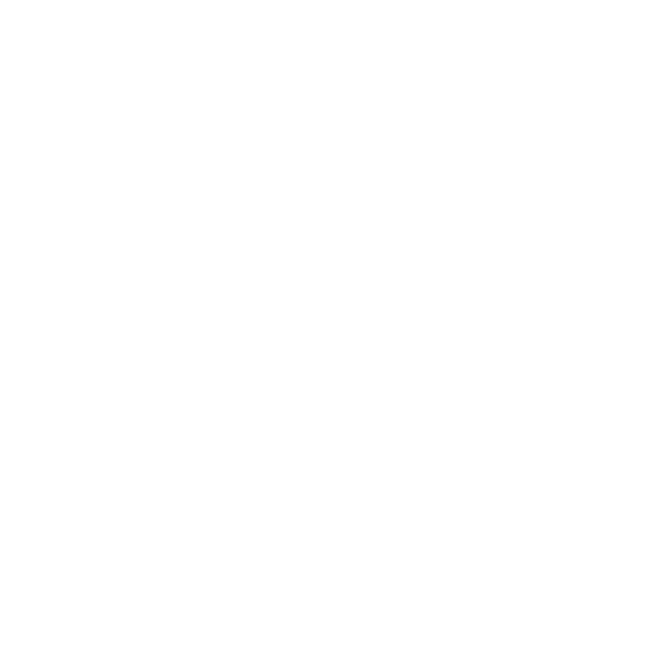

0
0
10
20
30
40


In [65]:
%matplotlib notebook

hemisphere = 'n'

fig = plt.figure(figsize=(10,10))

if hemisphere == 'n':
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())    
else:  
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax.margins()

s = 4
scale = 200
size_lim = 20


qv  =   ax.pcolormesh(lons,
                   lats,
                   data['z'][0],
                  transform=ccrs.PlateCarree(),
                     )

plt.colorbar(qv)

# c  =   ax.contour(lons,
#                    lats,
#                    data['z'][7][0],
#                   transform=ccrs.PlateCarree(),
#                   levels=np.linspace(-2500,2500,10),alpha=0,
#                      )

    
ann = ax.annotate('',
                  xy=(0.05,0.9),
                  xycoords='axes fraction',
                  fontsize=25,
                  ha='left')

ann.set_animated(True)

list_of_cs = []
    
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

########################################################

def animate(frame):
    
    if frame % 10 == 0: #Track progress
        print(frame)

    day = frame
    
    date = start_day + datetime.timedelta(days=day*7)

    ann.set_text(f'{dates[frame]}')

    for i in list_of_cs:
        i.set_alpha(0)

        
    c = plt.contour(lons,
                   lats,
                   z[day],
                  transform=ccrs.PlateCarree(),
                  levels=np.linspace(-2500,2500,10),
                    colors='k',
                     )

    qv.set_array(z[day][:-1,:-1])

    list_of_cs.append(c)
    
#######################################################

ani = animation.FuncAnimation(fig,
                              animate,
#                              frames= range(0,1),
                             frames= range(0,z.shape[0]),
                             )    

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [66]:
Writer = animation.writers['ffmpeg']

writer = Writer(fps=5, metadata=dict(artist='Robbie Mallett CPOM UCL'))

ani.save('/home/robbie/Dropbox/beaufort_sea/gph_1000hpa.mp4', writer=writer)

0


<IPython.core.display.Javascript object>

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

In [ ]:
def cplot(lon,
          lat,
          pressure,
          bounding_lat=65,
          land=True,
          gridlines=True,
          figsize=[10,5],
          color_scale=(None,None),
          color_scheme='plasma',
          scale=100):
    
    """
    Plots a north polar plot using cartopy. \
    Must be supplied with gridded arrays of lon, lat and data
    """

    
    # Make figure template

    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.NorthPolarStereo())

    
    if land == True: # Superimposes a land mask
        ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

    # Set the extent of the plot, using the latitudinal limit given in the function arguments    
    
    ax.set_extent([-180, 180, 90, 70], ccrs.PlateCarree())
    
#     if gridlines == True:
#         ax.gridlines()
        
#     vmin, vmax = color_scale[0], color_scale[1]
    
    c = ax.contourf(lon, lat, pressure,
              transform=ccrs.PlateCarree(),
              levels=np.linspace(-2500,2500,10)
             )
    plt.colorbar(c)
    
    plt.show()

cplot(lons, lats, data['z'][-2])

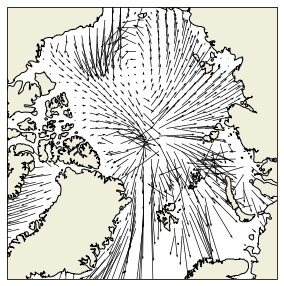

In [160]:

year = 2011 

d = Dataset(f'/home/robbie/Dropbox/Data/IMV/icemotion_daily_nh_25km_{year}0101_{year}1231_v4.1.nc')

sow_u = np.nanmean(d['u'][95:100],axis=0)
sow_v = np.nanmean(d['v'][95:100],axis=0)


IMV_field_u = mask_large_vals(sow_u,threshold=1000)
IMV_field_v = mask_large_vals(sow_v,threshold=1000)

# IMV_field_u = sam_mask(IMV_field_u,min_lat=80,max_lat=82)
# IMV_field_v = sam_mask(IMV_field_v,min_lat=80,max_lat=82)

IMV_field_N = -IMV_field_u * np.sin(np.radians(lon_grid)) + IMV_field_v * np.cos(np.radians(lon_grid))

# IMV_field_u.shape

skipper = 5

qplot(lon_grid[::skipper,::skipper],lat_grid[::skipper,::skipper],
      IMV_field_u[::skipper,::skipper],IMV_field_v[::skipper,::skipper],scale=50)



(array([  5.,   9.,  13.,  33.,  59.,  52.,  47., 122.,  59.]),
 array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ]),
 <BarContainer object of 9 artists>)

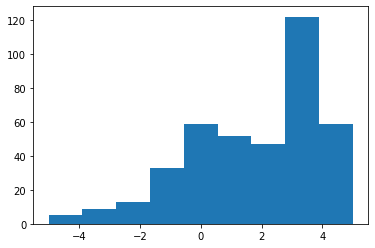

In [136]:
IMV_field_N_valid = [v for v in IMV_field_N.ravel() if ~np.isnan(v)]
plt.hist(IMV_field_N_valid, bins=np.linspace(-5,5,10))


(array([0., 0., 0., 0., 4., 1., 1., 0., 0.]),
 array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ]),
 <BarContainer object of 9 artists>)

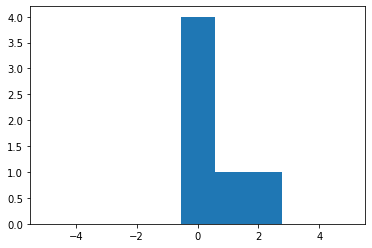

In [133]:
IMV_field_N_valid = [v for v in IMV_field_u.ravel() if ~np.isnan(v)]
plt.hist(IMV_field_N_valid, bins=np.linspace(-5,5,10))
